In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("CairoMakie")

Pkg.status()

  Activating new project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter3`
  Installing known registries into `C:\Users\nguye\.julia`
    Updating registry at `C:\Users\nguye\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter3\Project.toml`
  [9a3f8284] + Random
    Updating `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter3\Manifest.toml`
  [9a3f8284] + Random
  [ea8e919c] + SHA v0.7.0
   Resolving package versions...
   Installed OffsetArrays ──────────────── v1.14.1
   Installed JpegTurbo_jll ─────────────── v3.0.3+0
   Installed x265_jll ──────────────────── v3.5.0+0
   Installed Calculus ──────────────────── v0.5.1
   Installed ImageIO ───────────────────── v0.6.8
   Installed AxisArrays ────────────────── v0.4.7
   Installed libfdk_aac_jll ────────────── v2.0.2+0
   Installed TiffImages ────────────────── v0.10.0
   Installed Libmount_jll ──────────────── v2.40.1+0
   Install

Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter3\Project.toml`
  [13f3f980] CairoMakie v0.12.4
  [9a3f8284] Random


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\GtFuI\src\scenes.jl:227


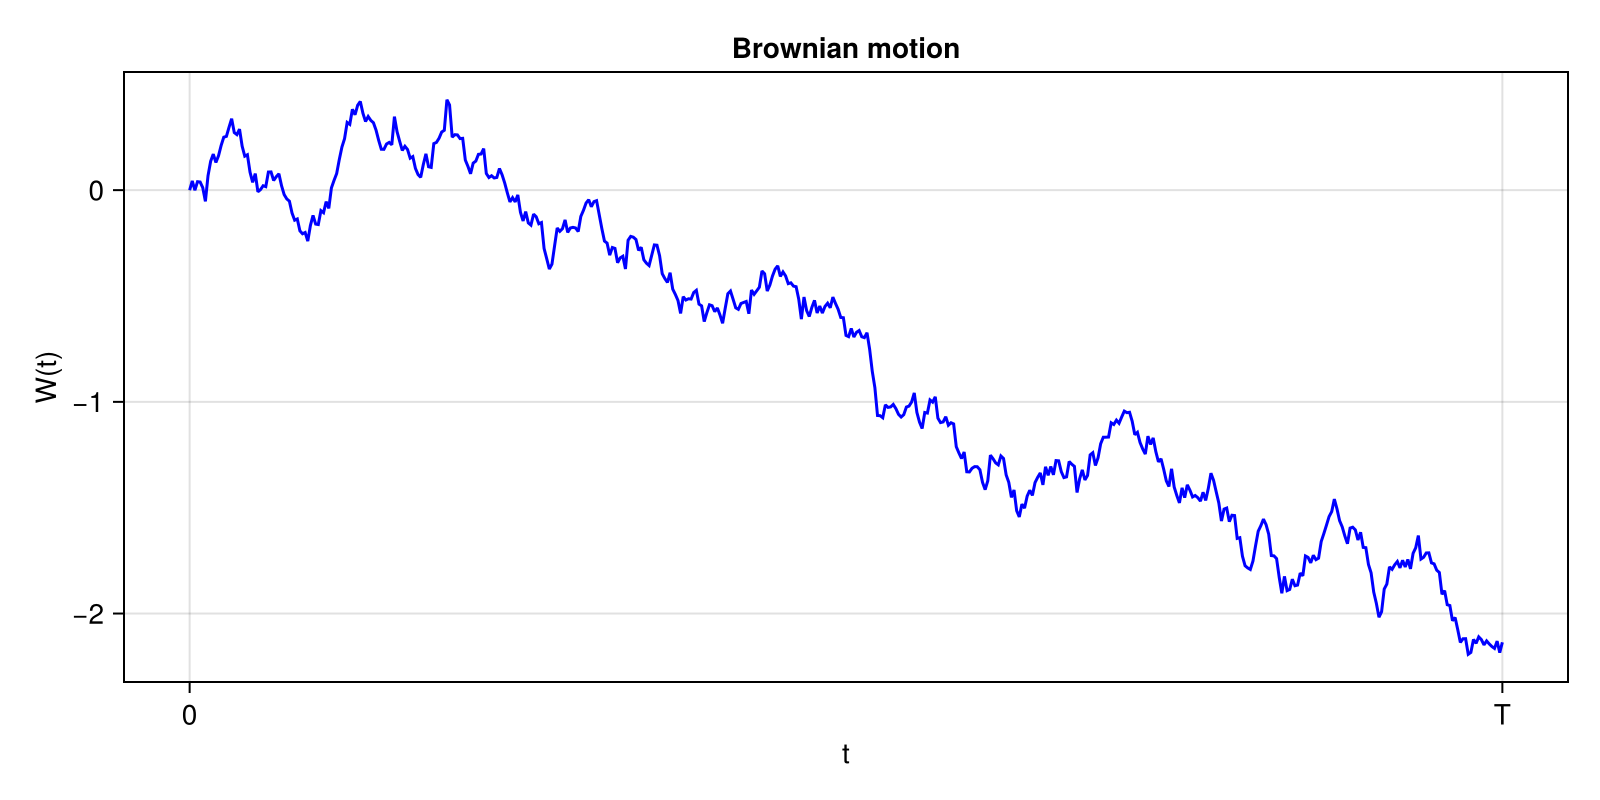

In [39]:
# # Translated from Matlab to Julia

# using Random, CairoMakie

# Random.seed!(1234)

# L = 500
# T = 1
# dt = T/L

# dW = sqrt(dt)*randn(L)
# W = cumsum(dW)

# fig = Figure(resolution = (800, 400))

# ax1 = Axis(
#     fig[1, 1],
#     xlabel = "t", ylabel = "W(t)",
#     xticks = ([0, L], ["0", "T"]),
#     title = "Brownian motion"
# )

# lines!(ax1, 0:L, [0; W], color = :blue)

# fig

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\GtFuI\src\scenes.jl:227


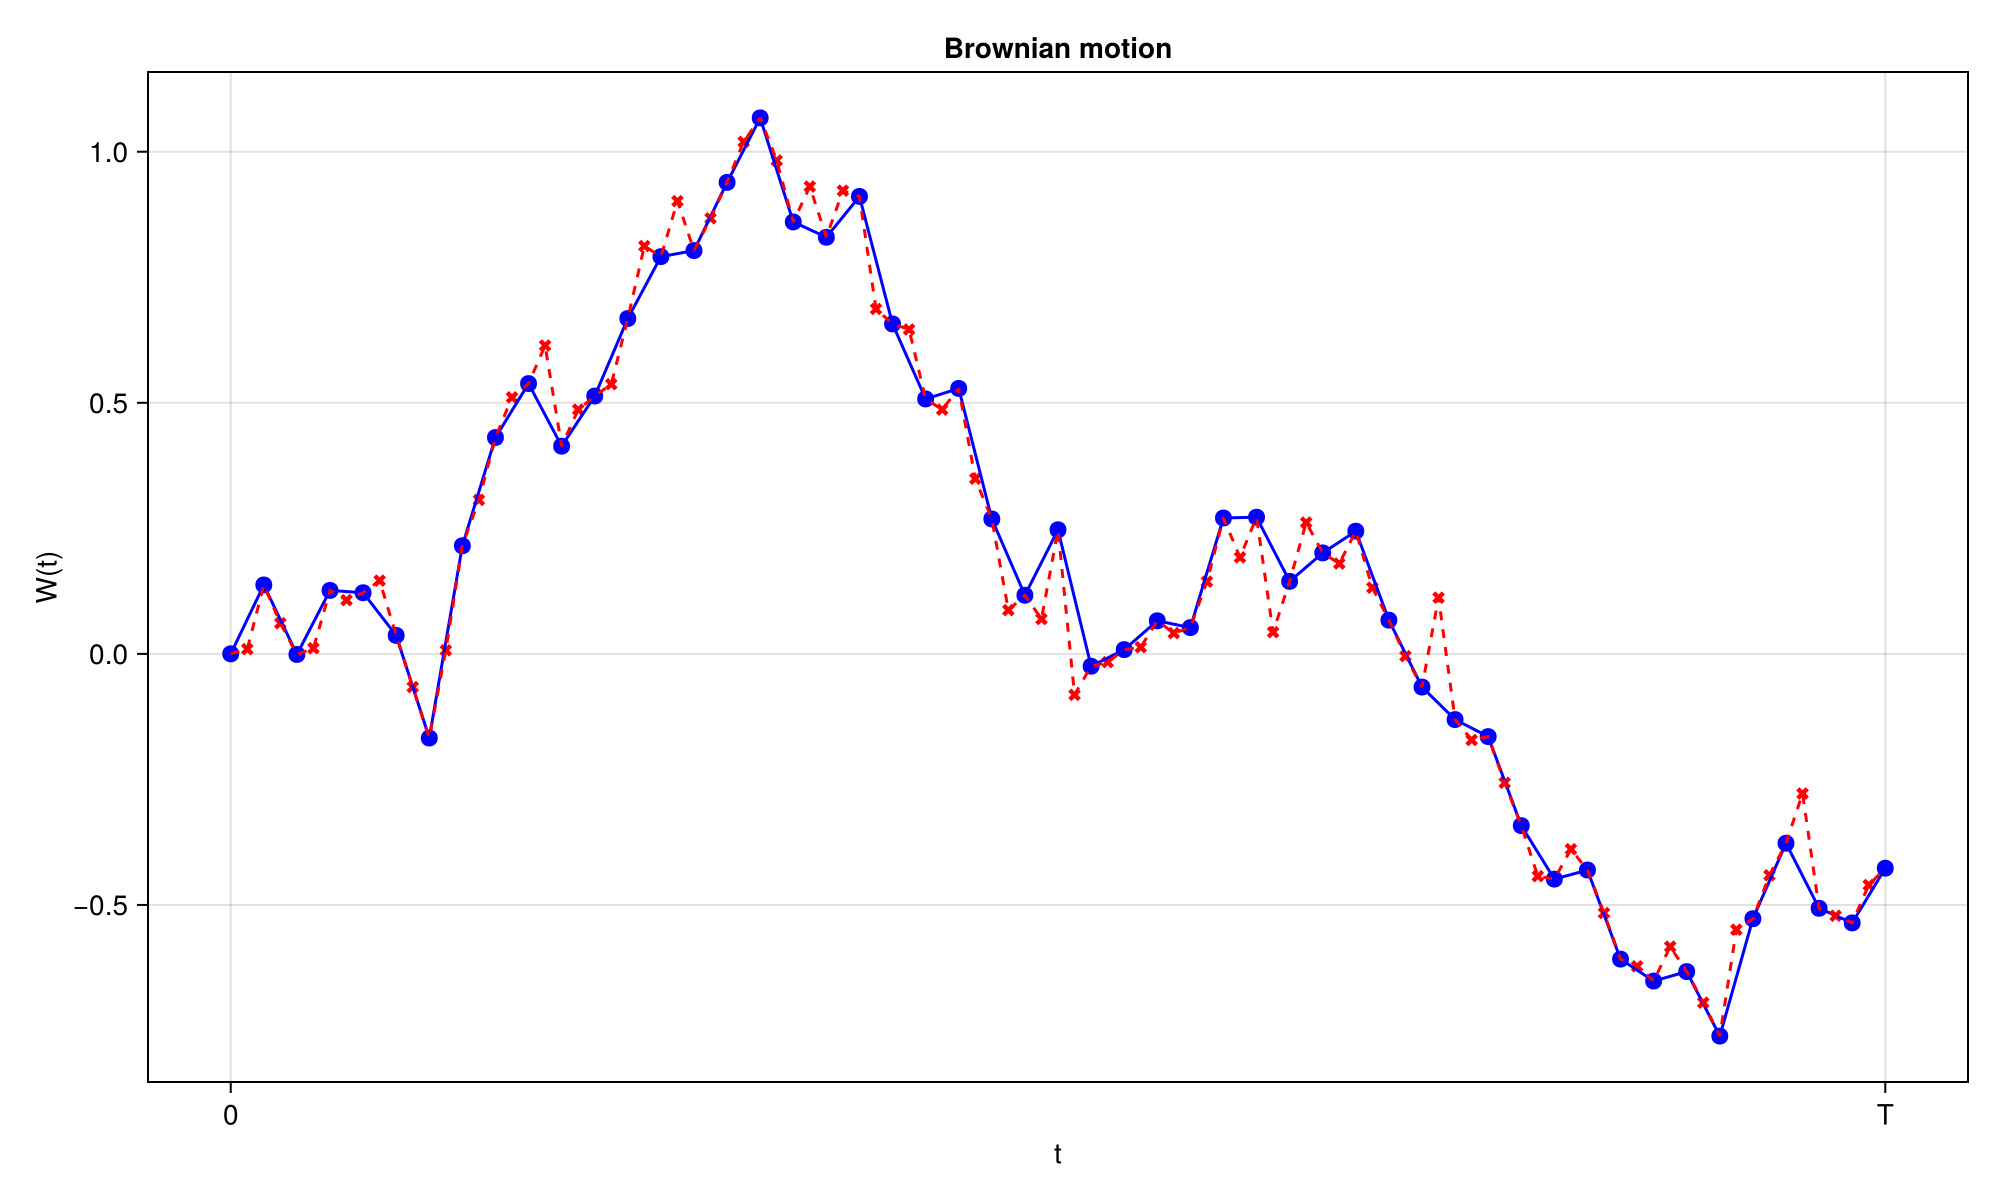

In [99]:
using Random, CairoMakie

Random.seed!(1234)

L = 50
T = 1
dt = T/L

dW = sqrt(dt)*randn(L)
W = cumsum(dW)

midW = (W .+ [0; W[1:end-1]]) ./ 2 .+ randn(L) * 0.5 * sqrt(dt)

fig = Figure(resolution = (1000, 600))

ax1 = Axis(
    fig[1, 1],
    xlabel = "t", ylabel = "W(t)",
    xticks = ([0, L], ["0", "T"]),
    title = "Brownian motion with midpoints"
)

scatter!(ax1, 0:0.5:L, [0; collect(Iterators.flatten(zip(midW, W)))], color = :red, markersize = 9, marker = :xcross)
scatter!(ax1, 0:L, [0; W], color = :blue, markersize = 12)

lines!(ax1, 0:L, [0; W], color = :blue, )
lines!(ax1, 0:0.5:L, [0; collect(Iterators.flatten(zip(midW, W)))], color = :red, linestyle = :dash)

fig